# Supporting Notebook for UMAP Presentation

In [1]:
import umap
import umap.plot
import numpy as np
import math
import matplotlib.pyplot as plt
import time
from matplotlib.offsetbox import AnnotationBbox, OffsetImage # For your annotation code
import pandas as pd
from scipy.io import loadmat
from sklearn.decomposition import PCA

#### A couple methods for constructing synthetic data

In [2]:
def circle(center,radius=1,noise=0.1,nPoints = 100):
    '''Expects center to be an numpy array (x1,x2).'''
    xNoise = np.random.uniform(-noise, noise, nPoints)
    yNoise = np.random.uniform(-noise, noise, nPoints)
    x = np.array([radius*np.cos(2*math.pi/nPoints*t) + xNoise[t]+center[0] for t in range(nPoints)])
    y = np.array([radius*np.sin(2*math.pi/nPoints*t) + yNoise[t]+center[1] for t in range(nPoints)])
    
    return np.array([x,y]).T

def gaussian(mean=[0,0],std=1,noise=[0.1,0.1],nPoints = 100):
    rNoise = np.random.uniform(-noise[0], noise[0], nPoints)
    tNoise = np.random.uniform(-noise[1], noise[1], nPoints)
    t = np.array([math.pi/nPoints*i + tNoise[i] for i in range(nPoints)])
    r = np.random.normal(loc=0,scale=std,size=(nPoints,1))
    
    x = np.array([r[i]*np.cos(t[i])+mean[0] for i in range(nPoints)])
    y = np.array([r[i]*np.sin(t[i])+mean[1] for i in range(nPoints)])
    return np.concatenate((x,y),axis=1)

In [3]:
C1 = circle([0,0],noise=0.15,nPoints=100)
C2 = circle([3,0],noise=0.5,radius=4,nPoints=100)
clabels = np.concatenate([np.zeros(100),np.ones(100)])
twocircles = np.concatenate([C1,C2])

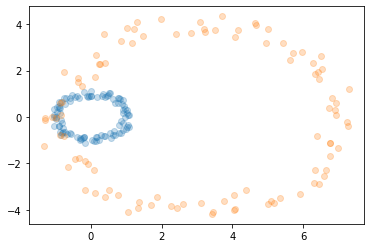

In [4]:
plt.scatter(C1[:,0],C1[:,1],alpha=0.25)
plt.scatter(C2[:,0],C2[:,1],alpha=0.25)

In [5]:
mapper = umap.UMAP(n_neighbors=15,min_dist=0.01)
t0 = time.time()
mapper.fit(twocircles)
t1 = time.time()
print("Time to complete: "+str(t1-t0))

Time to complete: 4.994184494018555


<AxesSubplot:>

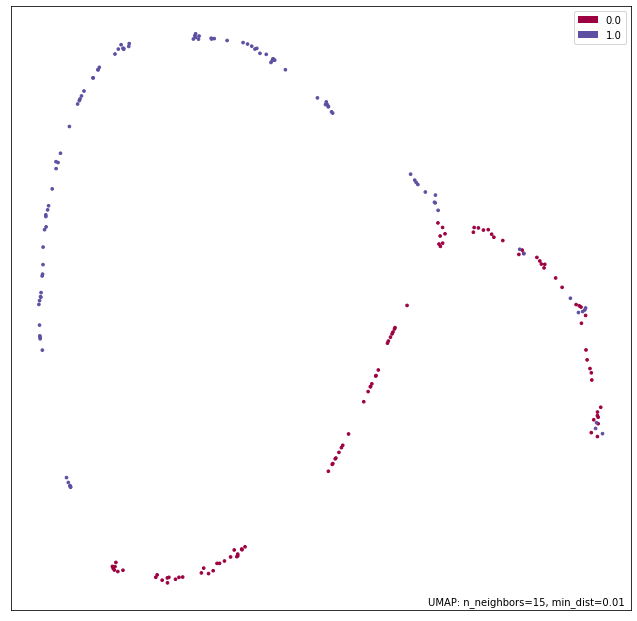

In [6]:
umap.plot.points(mapper,labels=clabels)

<AxesSubplot:>

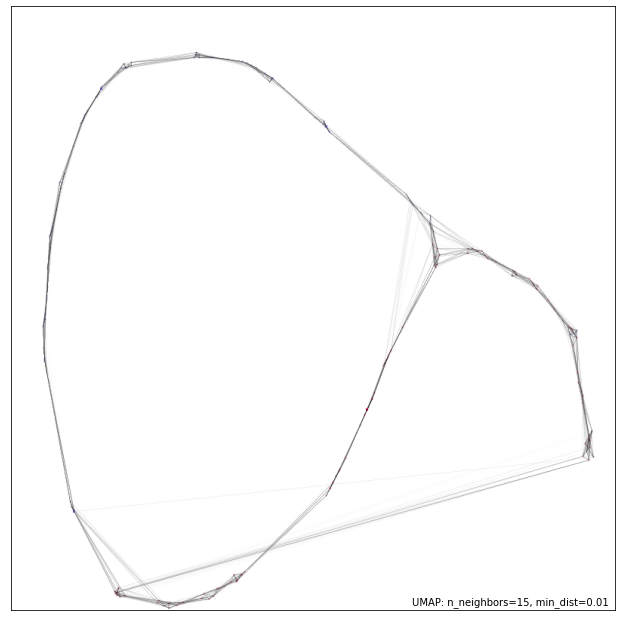

In [7]:
umap.plot.connectivity(mapper, labels=clabels,show_points=True)

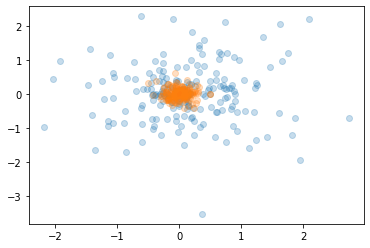

In [8]:
G1 = gaussian(nPoints=200,std=.2)
G2 = gaussian(nPoints=200)

glabels = np.concatenate([np.zeros(200),np.ones(200)])
twogauss = np.concatenate([G1,G2])

plt.scatter(G2[:,0],G2[:,1],alpha=0.25)
plt.scatter(G1[:,0],G1[:,1],alpha=0.25)

In [9]:
mapper = umap.UMAP(n_neighbors=25,min_dist=0.01)
t0 = time.time()
mapper.fit(twogauss)
t1 = time.time()
print("Time to complete: "+str(t1-t0))

Time to complete: 2.008702278137207


<AxesSubplot:>

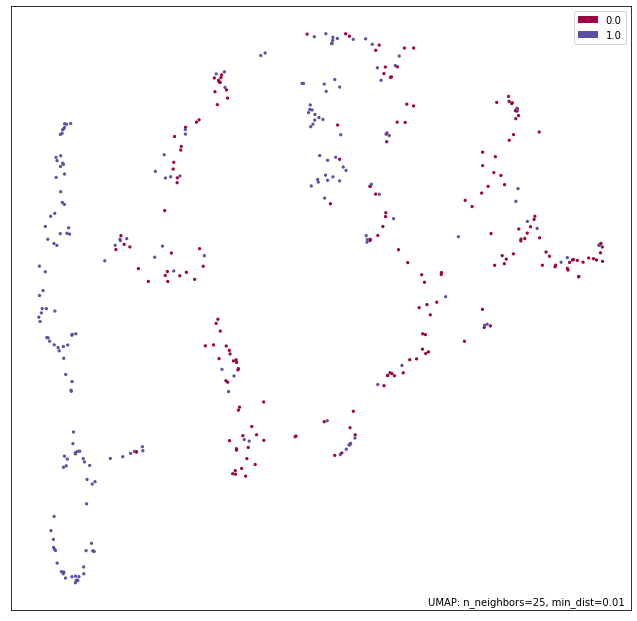

In [10]:
umap.plot.points(mapper,labels=glabels)

<AxesSubplot:>

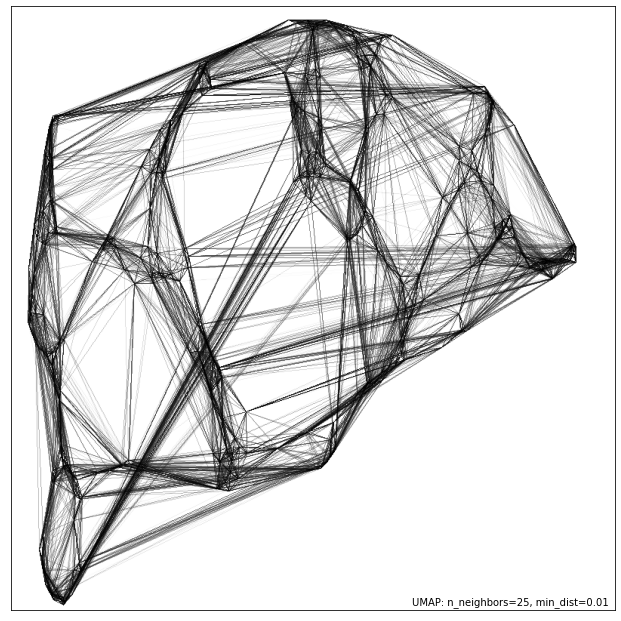

In [11]:
umap.plot.connectivity(mapper,show_points=False)

### Hindi Grayscale Image

In [12]:
df = pd.read_csv('test(grayscale_inverted).csv')

In [13]:
#images to keep
keep = []
for i in range(384):
    keep.extend([158*i+j for j in range(20)])

In [14]:
labels = df['label'].to_numpy()
df = df.drop(columns=['Index','label'])

Time to complete: 36.21076798439026


No handles with labels found to put in legend.


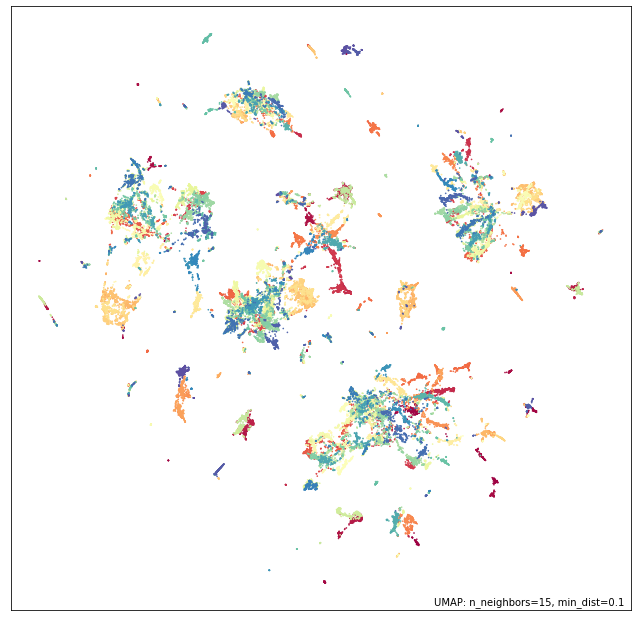

In [15]:
mapper = umap.UMAP(n_neighbors=15,min_dist=0.1)
t0 = time.time()
mapper.fit(df.to_numpy())
t1 = time.time()
print("Time to complete: "+str(t1-t0))

p = umap.plot.points(mapper,labels=labels)
p.legend().remove()

##### Locating unique characters in the dataset

In [16]:
uniqueLabels = []
for c in labels:
    if c not in uniqueLabels:
        uniqueLabels.append(c)
uniqueLabels = np.array(uniqueLabels)
for c in uniqueLabels:
    print(c,end=' ')

अ अं अः आ इ ई उ ऊ ऋ ए ऐ ओ औ क कं कः का कि की कु कू के कै को कौ ख खं खः खा खि खी खु खू खे खै खो खौ ग गं गः गा गि गी गु गू गे गै गो गौ घ घं घः घा घि घी घु घू घे घै घो ङ च चं चः चा चि ची चु चू चे चै चो चौ छ छं छः छा छि छी छु छू छे छै छो छौ ज जं जः जा जि जी जु जू जे जै जो जौ झ झं झः झा झि झी झु झू झे झै झो झौ ञ ट टं टः टा टि टी टु टू टे टै टो टौ ठ ठं ठः ठा ठि ठी ठु ठू ठे ठै ठो ठौ ड डं डः डा डि डी डु डू डे डै डो डौ ढ ढं ढः ढा ढि ढी ढु ढू ढे ढै ढो ढौ ण णं णः णा णि णी णु णू णे णै णो णौ त तं तः ता ति ती तु तू ते तै तो तौ थ थं थः था थि थी थु थू थे थै थो थौ द दं दः दा दि दी दु दू दे दै दो दौ ध धं धः धा धि धी धु धू धे धै धो धौ न नं नः ना नि नी नु नू ने नै नो नौ प पं पः पा पि पी पु पू पे पै पो पौ फ फं फः फा फि फी फु फू फे फै फो फौ ब बं बः बा बि बी बु बू बे बै बो बौ भ भं भः भा भि भी भु भू भे भै भो भौ म मं मः मा मि मी मु मू मे मै मो मौ य यं यः या यि यी यु यू ये यै यो यौ र रं रः रा रि री रे रै रो रौ ल लं लः ला लि ली लु लू ले लै लो लौ व वं वः वा वि वी वु वू वे वै वो वौ श शं शः शा शि शी शु शू शे शै शो 

##### Picking Six Similar Characters for UMAP

In [17]:
for c in uniqueLabels[[0,1,2,3,11,12]]:
    print(c,end=' ')

अ अं अः आ ओ औ 

In [18]:
labelSets = []
for i in [0,1,2,3,11,12]:
    labelSets.append(np.array([i for j in range(i*158,(i+1)*158)]))
labelSubset = np.concatenate(labelSets)

dataSets = []
for i in [0,1,2,3,11,12]:
    dataSets.append(np.array([j for j in range(i*158,(i+1)*158)]))
dataSubset = np.concatenate(dataSets)

In [19]:
dfSubset = df.loc[dataSubset]

Time to complete: 3.0066897869110107


Text(0.5, 1.0, 'UMAP')

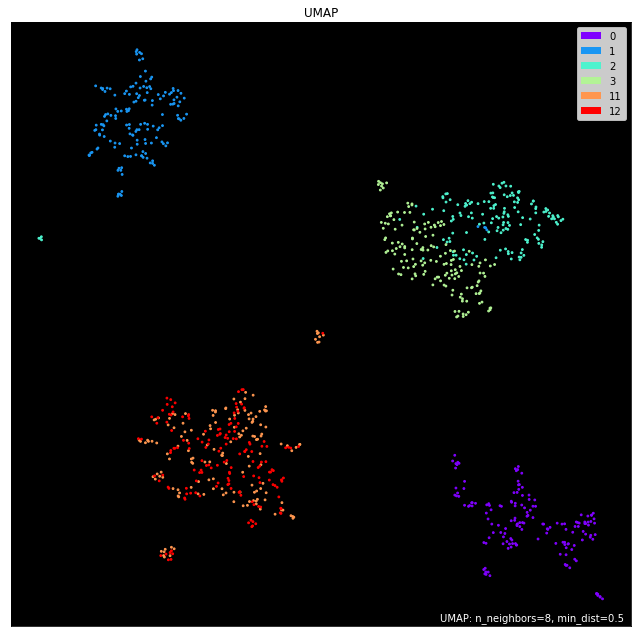

In [20]:
mapper = umap.UMAP(n_neighbors=8,min_dist=0.5)
t0 = time.time()
mapper.fit(dfSubset.to_numpy())
t1 = time.time()
print("Time to complete: "+str(t1-t0))

umap.plot.points(mapper,labels=labelSubset,theme='fire')
plt.title("UMAP")

### Salinas AVIRIS Sensor Data

In [21]:
def reshapeImage(data):
    '''Takes image data image height x image width x image depth
    and returns the design matrix (Height*Width) x image depth.'''
    H, W, D = data.shape
    flatData = np.zeros([H*W,D],dtype=int)
    for h in range(H):
        for w in range(W):
            flatData[w+h*W,:] = data[h,w,:]
    return flatData

def reshapeLabels(data):
    '''Takes image data image height x image width x image depth
    and returns the design matrix (Height*Width) x image depth.'''
    H, W = data.shape
    flatData = np.zeros([H*W],dtype=int)
    for h in range(H):
        for w in range(W):
            flatData[w+h*W] = data[h,w]
    return flatData

#### AVIRIS Salina All Data

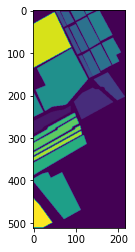

In [22]:
gt = loadmat('Salinas_gt.mat')
label = gt['salinas_gt']

data = loadmat('Salinas_corrected.mat')
image = data['salinas_corrected']

plt.imshow(label)

In [23]:
flatlabel = reshapeLabels(label)
flatdata = reshapeImage(image)

Nearly half of the pixels have no label associated with them (i.e. they are not pictures of fields, but rather brush).  We will remove them from our dataset prior to using UMAP.  You may consider them 'noise'.

In [24]:
flatlabelnozero = flatlabel[flatlabel > 0]
flatdatanozero = flatdata[flatlabel>0,:]

Time to complete: 33.982314109802246


Text(0.5, 1.0, 'AVIRIS Salinas All Data')

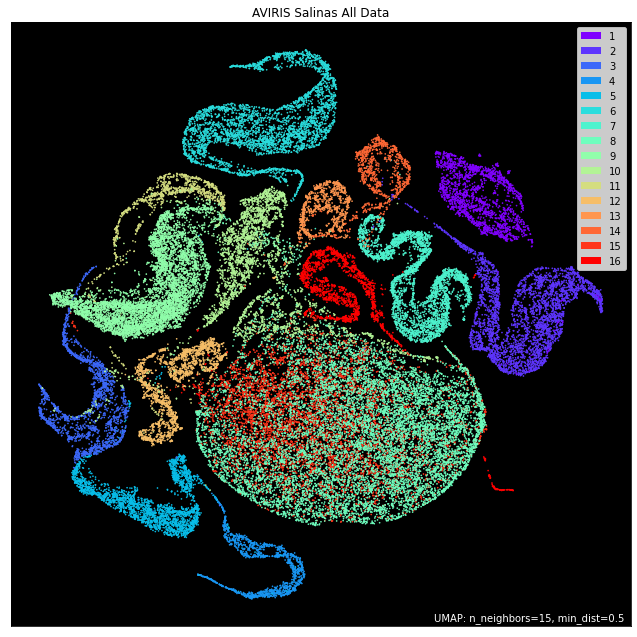

In [25]:
mapper = umap.UMAP(n_neighbors=15,min_dist=0.5)
t0 = time.time()
mapper.fit(flatdatanozero)
t1 = time.time()
print("Time to complete: "+str(t1-t0))

umap.plot.points(mapper,labels=flatlabelnozero,theme='fire')
plt.title("AVIRIS Salinas All Data")

#### PCA of SHABD and AVIRIS Datasets for Comparison

Time: 0.03703594207763672
Time: 2.0991363525390625


Text(0.5, 1.0, 'PCA of SHABD Dataset')

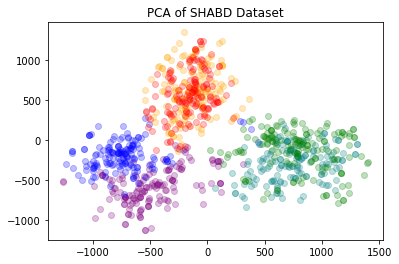

In [26]:
t0 = time.time()
pca = PCA(n_components=2)
X = dfSubset.to_numpy()
Xr = pca.fit(X).transform(X)
t1 = time.time()
cdict = {0:'purple', 1:'blue',2:'teal',3:'green',11:'orange',12:'red'}
for k in list(cdict.keys()):
    for i in range(Xr.shape[0]):
        if labelSubset[i]==k:
            plt.scatter(Xr[i,0],Xr[i,1],c=cdict[k],alpha=.25)
t2 = time.time()
print("Time: "+str(t1-t0))
print("Time: "+str(t2-t0))
plt.title("PCA of SHABD Dataset")

Time: 0.4360828399658203
Time: 0.7361679077148438


Text(0.5, 1.0, 'PCA of AVIRIS Dataset')

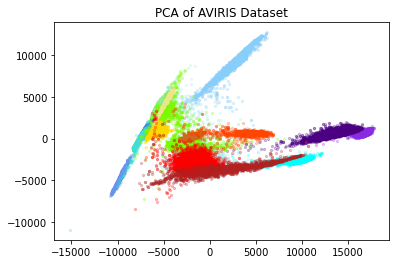

In [27]:
t0 = time.time()
pca = PCA(n_components=2)
Xr = pca.fit(flatdatanozero).transform(flatdatanozero)
t1= time.time()
print("Time: "+str(t1-t0))
cdict = {1:'blueviolet', 2:'indigo',3:'royalblue',4:'cornflowerblue',5:'turquoise',6:'lightskyblue',
         7:'cyan',8:'paleturquoise',9:'lightgreen',10:'lawngreen',11:'khaki',12:'gold',
         13:'chocolate',14:'orangered',15:'red',16:'firebrick'}
#flatdatanozero
#flatlabelnozero
indexlist = []
for k in list(cdict.keys()):
    for i in range(Xr.shape[0]):
        if flatlabelnozero[i]==k:
            indexlist.append(i)
    plt.scatter(Xr[indexlist,0],Xr[indexlist,1],c=cdict[k],alpha=.25,s=5)
    indexlist=[]
t2=time.time()
print("Time: "+str(t2-t0))
plt.title("PCA of AVIRIS Dataset")

Sources for data can be found in the presentation file.  